In [1]:
# Camera calibration 
# To find distortion co-efficients

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

calib_images = glob.glob('./camera_cal/calibration*.jpg')

#img = mpimg.imread('./camera_cal/calibration1.jpg')#ret -> False
#img = mpimg.imread('./camera_cal/calibration2.jpg')#ret -> False

#plt.imshow(img)
nx = 9
ny = 6
objpoints = []
imgpoints =[]
objpt = np.zeros((ny*nx,3),np.float32)
#print(objpt)

# Chess board corner co-ordinates in 3D
objpt[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)
#print(objpt)

for f_name in calib_images:
    img = mpimg.imread(f_name)
    #Converting to gray for better corner detection
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #plt.imshow(gray,cmap = 'gray')

    # Finding Corners on chessboard
    ret,corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    #print(ret)

    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objpt)
        #displaying corners
        #img = cv2.drawChessboardCorners(img,(nx,ny),corners,ret)
        #plt.imshow(img)


In [2]:
# Camera Calibration
def Calibrate_camera(objpoints,imgpoints):
    return cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

ret,mtx,dist,rvecs,tvecs = Calibrate_camera(objpoints,imgpoints)
print(mtx)


[[1.15396093e+03 0.00000000e+00 6.69705359e+02]
 [0.00000000e+00 1.14802495e+03 3.85656232e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [18]:
# Reading a road image with lane lines
rd_img = mpimg.imread('./test_images/test2.jpg')
print(rd_img.shape)
# Undistorting the test image
def undistort_img(rd_img):
    dst = cv2.undistort(rd_img,mtx,dist)
    #plt.imshow(dst)
    return dst


(720, 1280, 3)


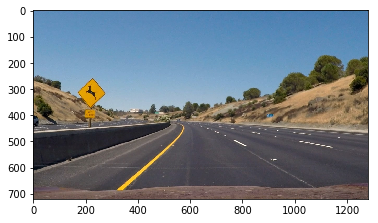

In [19]:
undist_img = undistort_img(rd_img)
plt.imshow(rd_img)

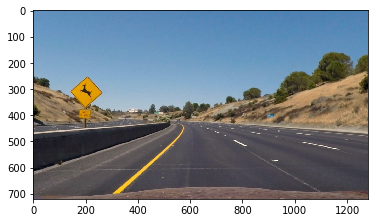

In [20]:
plt.imshow(undist_img)

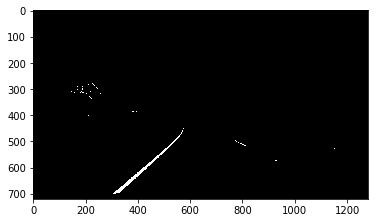

In [21]:
 hls_img = cv2.cvtColor(undist_img,cv2.COLOR_RGB2HLS)
# Choosing Saturation channel for gradient
s_channel = hls_img[:,:,2]
#plt.imshow(ls_img)
l_channel = hls_img[:,:,1]
#plt.imshow(ls_img,cmap = 'gray')
#thres = (150,255)
thres = (120,150)

binary_s = np.zeros_like(s_channel)
binary_s[(l_channel > thres[0]) & (s_channel > thres[1])] =1
plt.imshow(binary_s,cmap = 'gray')

In [90]:
import numpy as np
pointsx = [200,400]
pointsy =  [720,100]
c_list = []
tst1 = np.polyfit(pointsx,pointsy,2)
print(tst1)
# c_list.append(tst1)
#print(c_list)

pointsx = (np.array(pointsx) + 100).tolist()
tst2 = np.polyfit(pointsx,pointsy,2)
print(tst2)
c_list.append([tst1.tolist(),tst2.tolist()])
c_list.append([tst1.tolist(),tst2.tolist()])
c_list.append([tst1.tolist(),tst2.tolist()])
if len(c_list) > 2:
    c_list = c_list[1:]
    c_list.append([tst2.tolist(),tst1.tolist()])
print(c_list)

[-5.23571429e-03  4.14285714e-02  9.21142857e+02]
[-4.01620648e-03  1.12965186e-01  1.04756903e+03]
[[[-0.005235714285714293, 0.04142857142857056, 921.1428571428582], [-0.004016206482593038, 0.11296518607442911, 1047.5690276110447]], [[-0.005235714285714293, 0.04142857142857056, 921.1428571428582], [-0.004016206482593038, 0.11296518607442911, 1047.5690276110447]], [[-0.004016206482593038, 0.11296518607442911, 1047.5690276110447], [-0.005235714285714293, 0.04142857142857056, 921.1428571428582]]]


C:\ProgramData\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:5: RankWarning: Polyfit may be poorly conditioned
C:\ProgramData\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:11: RankWarning: Polyfit may be poorly conditioned


In [60]:
test = [[array([ 1.23406706e-05, -6.46185471e-02,  3.60123399e+02]), array([-1.89241096e-05,  8.74910084e-02,  8.74516762e+02])], [array([ 1.23406706e-05, -6.46185471e-02,  3.60123399e+02]), array([-1.89241096e-05,  8.74910084e-02,  8.74516762e+02])], [array([-1.06355495e-06, -5.40657980e-02,  3.58519661e+02]), array([-6.77725695e-06,  7.30924883e-02,  8.79627720e+02])], [array([-2.38450699e-06, -4.87539803e-02,  3.54676145e+02]), array([-4.34427555e-06,  6.57908080e-02,  8.85642815e+02])], [array([-2.44428411e-05, -4.23039664e-02,  3.62221946e+02]), array([3.36287341e-05, 4.55183400e-02, 8.82571777e+02])], [array([-3.91034786e-05, -3.19208238e-02,  3.62316308e+02]), array([1.94762710e-05, 4.80965854e-02, 8.85715705e+02])], [array([-5.30842515e-05, -1.96815186e-02,  3.61000191e+02]), array([-1.82264533e-05,  7.74622769e-02,  8.82315773e+02])], [array([-4.62346669e-05, -2.60445164e-02,  3.64121773e+02]), array([-2.56239941e-05,  8.24014313e-02,  8.81887940e+02])], [array([-4.65383361e-05, -2.48976532e-02,  3.64478182e+02]), array([-1.70222194e-05,  6.92377120e-02,  8.87428461e+02])], [array([-5.48831117e-05, -2.60887881e-02,  3.71951945e+02]), array([2.90502518e-05, 3.94332170e-02, 8.86069136e+02])], [array([-5.73600210e-05, -1.87031655e-02,  3.67702820e+02]), array([4.45547077e-05, 2.02514613e-02, 8.93849856e+02])], [array([-6.59647559e-05, -6.81869588e-03,  3.64197957e+02]), array([ 9.56650052e-05, -1.67949778e-02,  9.01304897e+02])], [array([-6.63342582e-05, -1.47286406e-03,  3.59221540e+02]), array([ 7.34603606e-05, -1.28386076e-02,  9.08029683e+02])], [array([-5.34881517e-05, -1.15182916e-03,  3.52761085e+02]), array([ 6.90634539e-05, -2.43445256e-02,  9.18353009e+02])], [array([-5.17934579e-05, -9.32306206e-03,  3.60341745e+02]), array([ 1.18260330e-04, -5.35018178e-02,  9.15642926e+02])], [array([-5.13376667e-05, -9.01946237e-03,  3.60037257e+02]), array([ 1.15855879e-04, -6.05319059e-02,  9.19901896e+02])], [array([-5.16402944e-05, -1.38036543e-02,  3.65360643e+02]), array([ 8.99174211e-05, -3.25502850e-02,  9.09980025e+02])], [array([-4.23116820e-05, -1.61573677e-02,  3.63106754e+02]), array([ 7.68342909e-05, -2.95409355e-02,  9.12549716e+02])], [array([-3.74719733e-05, -1.78825472e-02,  3.62822166e+02]), array([ 6.47169747e-05, -2.60386995e-02,  9.14110915e+02])], [array([-2.10941911e-05, -2.51163813e-02,  3.62704501e+02]), array([1.83822144e-05, 1.29182824e-02, 9.07232456e+02])], [array([-1.65457585e-05, -1.25837295e-02,  3.50903310e+02]), array([ 4.13262804e-05, -2.37707433e-02,  9.23276431e+02])], [array([-1.38244416e-05, -2.37226066e-02,  3.58383011e+02]), array([4.76387383e-06, 1.56238968e-02, 9.10134102e+02])], [array([-9.05445173e-06, -2.11535050e-02,  3.54483646e+02]), array([-2.22567287e-05,  2.61868274e-02,  9.12184123e+02])], [array([ 3.79537040e-06, -3.03776732e-02,  3.55825131e+02]), array([-3.44776388e-05,  2.99005535e-02,  9.13073247e+02])], [array([ 1.09032078e-05, -3.91599021e-02,  3.59817028e+02]), array([3.01631683e-06, 8.83401707e-03, 9.12463192e+02])], [array([ 2.21723024e-05, -3.47609752e-02,  3.50224740e+02]), array([ 8.38012160e-06, -1.11780335e-02,  9.26476394e+02])], [array([ 2.47429049e-05, -3.89313777e-02,  3.52752339e+02]), array([ 3.34703856e-05, -2.56577811e-02,  9.27011488e+02])], [array([ 2.43589673e-05, -3.15282632e-02,  3.46449025e+02]), array([ 6.78581936e-06, -1.55511664e-02,  9.33124273e+02])], [array([ 3.12524187e-05, -3.28804261e-02,  3.44021661e+02]), array([ 3.92082528e-05, -4.43272929e-02,  9.40994044e+02])], [array([ 3.35303291e-05, -3.28355074e-02,  3.42157123e+02]), array([ 2.45175827e-05, -3.63270383e-02,  9.42454420e+02])], [array([ 3.38627810e-05, -2.75725872e-02,  3.36945343e+02]), array([ 1.10625475e-05, -3.41894464e-02,  9.48976301e+02])], [array([ 4.03810060e-05, -3.94160645e-02,  3.43273982e+02]), array([ 4.53528006e-06, -2.46261345e-02,  9.44931107e+02])], [array([ 3.91711076e-05, -3.38345590e-02,  3.37453291e+02]), array([-6.23749768e-06, -2.38000370e-02,  9.51094692e+02])], [array([ 3.69777932e-05, -3.02443798e-02,  3.34603072e+02]), array([-1.05612899e-06, -2.91683871e-02,  9.53922404e+02])], [array([ 2.87706080e-05, -3.22008070e-02,  3.40148072e+02]), array([-4.74815799e-05,  1.67052328e-02,  9.40893250e+02])], [array([ 2.33847063e-05, -3.28959619e-02,  3.41645739e+02]), array([-9.19458204e-05,  4.65886706e-02,  9.37392400e+02])], [array([ 2.63555045e-05, -4.72191770e-02,  3.51873731e+02]), array([-1.00710054e-04,  7.40864598e-02,  9.22717701e+02])], [array([ 2.06496958e-05, -4.81289691e-02,  3.55006691e+02]), array([-5.98309977e-05,  5.17705545e-02,  9.23991306e+02])], [array([ 1.61735725e-05, -5.81122586e-02,  3.65179402e+02]), array([-1.16533578e-05,  2.73945792e-02,  9.19844080e+02])], [array([ 1.31306638e-05, -5.98515578e-02,  3.69137318e+02]), array([-1.97471063e-05,  4.27144133e-02,  9.12288305e+02])], [array([ 7.69837407e-07, -5.06994756e-02,  3.67838273e+02]), array([-1.44111025e-05,  3.68632950e-02,  9.14156130e+02])], [array([ 1.35752083e-05, -6.29405274e-02,  3.71896754e+02]), array([-7.80415988e-06,  3.67651764e-02,  9.11339045e+02])], [array([ 1.57557424e-06, -4.19840834e-02,  3.62081739e+02]), array([-1.08146818e-05,  2.77569409e-02,  9.19916872e+02])], [array([-7.00092827e-06, -3.04517513e-02,  3.58965321e+02]), array([-2.79723093e-05,  4.45132008e-02,  9.16105981e+02])], [array([ 1.12939355e-06, -2.75050258e-02,  3.52004644e+02]), array([-1.61559882e-05,  2.38121304e-02,  9.26353726e+02])], [array([ 1.55367320e-06, -2.63259456e-02,  3.49918177e+02]), array([-3.64111371e-05,  3.65208414e-02,  9.26827191e+02])], [array([ 1.69359048e-07, -2.57589823e-02,  3.50593644e+02]), array([-6.88507670e-05,  6.78363449e-02,  9.17917537e+02])], [array([-1.19413562e-05, -1.48196726e-02,  3.48381023e+02]), array([-7.21112433e-05,  7.00838806e-02,  9.16952176e+02])], [array([-1.03152532e-05, -2.14253458e-02,  3.53042271e+02]), array([-1.97828007e-05,  4.73740707e-02,  9.12592243e+02])], [array([-1.38950861e-05, -1.17218937e-02,  3.46436082e+02]), array([-1.40254188e-05,  3.36728154e-02,  9.19922252e+02])], [array([-6.21393724e-06, -6.54173793e-03,  3.38158594e+02]), array([-2.85389735e-05,  3.14013570e-02,  9.28855756e+02])], [array([-1.81912913e-05,  1.41354671e-02,  3.28819247e+02]), array([-1.17200483e-05,  1.29406383e-02,  9.37017087e+02])], [array([-1.07053213e-05,  2.09680899e-02,  3.19902902e+02]), array([-1.26383196e-05,  9.08150689e-04,  9.48777250e+02])], [array([-7.63544947e-06,  6.21757302e-03,  3.31028771e+02]), array([ 4.08325668e-05, -2.73172133e-02,  9.44577696e+02])], [array([-1.05974905e-05,  9.41396303e-03,  3.29993900e+02]), array([ 3.01701000e-05, -2.46196363e-02,  9.46947152e+02])], [array([-6.32363192e-06,  9.87104455e-03,  3.28732321e+02]), array([ 1.35397819e-05, -1.05777471e-02,  9.44613660e+02])], [array([-3.15525756e-06,  5.04506644e-03,  3.30854631e+02]), array([ 1.93661091e-05, -1.41208555e-02,  9.43609322e+02])], [array([-1.56860891e-05,  2.13696374e-02,  3.23987652e+02]), array([ 1.52982601e-05, -1.38783695e-02,  9.46025839e+02])], [array([-1.24537500e-05,  1.73005574e-02,  3.25664988e+02]), array([-1.34076563e-05,  1.22205831e-02,  9.38210337e+02])], [array([3.70583486e-06, 9.01558821e-03, 3.22975260e+02]), array([-3.86798210e-05,  2.27894634e-02,  9.39821297e+02])], [array([8.77492134e-06, 1.82341412e-03, 3.25931045e+02]), array([-1.34982517e-04,  1.01703224e-01,  9.22891129e+02])], [array([-4.07323148e-06,  1.41700281e-02,  3.22879286e+02]), array([-1.20618200e-04,  1.00853507e-01,  9.18641096e+02])], [array([ 2.08558361e-05, -1.02367901e-02,  3.29325239e+02]), array([-8.43457233e-05,  8.46041229e-02,  9.15547622e+02])], [array([ 5.33192019e-06, -8.08079392e-03,  3.35903584e+02]), array([-3.64519121e-05,  6.45597530e-02,  9.07556943e+02])], [array([ 2.14135303e-05, -1.65593678e-02,  3.34050122e+02]), array([-4.26848597e-06,  3.59070992e-02,  9.14367225e+02])], [array([ 1.09462247e-05, -1.00320268e-02,  3.34595256e+02]), array([-9.71498566e-06,  4.73937801e-02,  9.08668993e+02])], [array([ 1.47889462e-05, -5.45547808e-03,  3.28723498e+02]), array([5.02502920e-06, 2.39714293e-02, 9.18624703e+02])], [array([ 1.96401155e-05, -2.79047504e-03,  3.24472338e+02]), array([-1.00647412e-05,  3.02669146e-02,  9.21888790e+02])], [array([ 2.17207148e-05, -6.98136715e-03,  3.27204849e+02]), array([-5.88358992e-05,  7.07203905e-02,  9.14420830e+02])], [array([ 2.29719579e-05, -5.07045886e-03,  3.24549092e+02]), array([-4.93422368e-05,  5.12159298e-02,  9.25011989e+02])], [array([ 2.69846008e-05, -2.27837348e-02,  3.35904125e+02]), array([-8.48908706e-06,  2.95554561e-02,  9.23009486e+02])], [array([ 1.13082311e-06, -6.33550900e-03,  3.35788777e+02]), array([-4.63959369e-05,  5.53520532e-02,  9.21127698e+02])], [array([-9.44256074e-06, -9.93901158e-04,  3.36731603e+02]), array([-1.02506384e-04,  9.55495142e-02,  9.16404619e+02])], [array([-2.50047884e-06, -1.12739997e-02,  3.41997474e+02]), array([-2.27669103e-04,  1.88278228e-01,  9.02204775e+02])], [array([ 8.89202661e-05, -9.85070570e-02,  3.62888799e+02]), array([-3.39974937e-04,  2.84985251e-01,  8.82799268e+02])], [array([ 1.45041968e-04, -1.57254964e-01,  3.79429251e+02]), array([-4.30038387e-04,  3.76339792e-01,  8.59376423e+02])], [array([ 1.37636919e-04, -1.38345220e-01,  3.67548296e+02]), array([-3.69646431e-04,  3.12229185e-01,  8.82259666e+02])], [array([ 1.34477601e-04, -1.33787641e-01,  3.64082010e+02]), array([-3.77935381e-04,  3.29560787e-01,  8.78757365e+02])], [array([ 1.33701125e-04, -1.18099099e-01,  3.52846660e+02]), array([-3.22907549e-04,  2.60863805e-01,  9.03919195e+02])], [array([ 2.18278167e-04, -2.05982337e-01,  3.76462623e+02]), array([-2.31658930e-04,  2.10630396e-01,  9.01350652e+02])], [array([ 3.12686550e-04, -3.11662149e-01,  4.10020585e+02]), array([-7.93950985e-05,  1.04846209e-01,  9.04516331e+02])], [array([ 3.44329349e-04, -3.62481172e-01,  4.30713695e+02]), array([3.97472865e-05, 7.38600391e-03, 9.17644455e+02])], [array([ 3.42451188e-04, -3.91337352e-01,  4.52484659e+02]), array([ 1.52468191e-04, -4.12079522e-02,  9.05537406e+02])], [array([ 4.32720194e-04, -4.87177087e-01,  4.77539597e+02]), array([ 2.97278913e-04, -1.29023251e-01,  9.16596325e+02])], [array([ 4.99688237e-04, -5.60384488e-01,  4.96913424e+02]), array([ 3.26267879e-04, -1.65290178e-01,  9.26398423e+02])], [array([ 4.86224476e-04, -5.38147750e-01,  4.87020627e+02]), array([ 3.02480313e-04, -1.66768591e-01,  9.35184393e+02])], [array([ 5.59730163e-04, -5.93943518e-01,  4.92626239e+02]), array([ 3.03532321e-04, -1.80965988e-01,  9.46112972e+02])], [array([ 5.75942507e-04, -6.14443360e-01,  5.00280937e+02]), array([ 2.30123526e-04, -1.36276696e-01,  9.41989502e+02])], [array([ 5.77791835e-04, -6.18252742e-01,  4.99404191e+02]), array([ 2.43500584e-04, -1.75374964e-01,  9.61615474e+02])], [array([ 3.38465150e-04, -3.76924975e-01,  4.43004593e+02]), array([ 1.84530416e-04, -1.45726937e-01,  9.60482769e+02])], [array([ 1.08995313e-04, -1.56878333e-01,  3.95264673e+02]), array([ 7.79491729e-05, -4.96905229e-02,  9.41590206e+02])], [array([-1.25183605e-04,  6.73134249e-02,  3.48128024e+02]), array([ 1.34697107e-04, -8.66130249e-02,  9.38928490e+02])], [array([-1.24553718e-04,  7.82421353e-02,  3.42222205e+02]), array([ 1.53701813e-04, -1.03680039e-01,  9.39820175e+02])], [array([-1.22597366e-04,  7.22354372e-02,  3.46015834e+02]), array([ 1.57168943e-04, -1.15426206e-01,  9.46016858e+02])], [array([-1.22119576e-04,  7.80516481e-02,  3.43951881e+02]), array([ 2.16024228e-04, -1.57651745e-01,  9.48697750e+02])], [array([-1.86548566e-04,  1.55476045e-01,  3.19979008e+02]), array([ 2.37552159e-04, -1.78566547e-01,  9.56076395e+02])], [array([-1.85623523e-04,  1.56701434e-01,  3.19494373e+02]), array([ 2.84609482e-04, -2.06877484e-01,  9.60376441e+02])], [array([-2.98175951e-04,  2.80345607e-01,  2.85022879e+02]), array([ 2.92611476e-04, -2.34877374e-01,  9.70832899e+02])], [array([-3.16506436e-04,  3.09934853e-01,  2.73210067e+02]), array([ 2.89349428e-04, -2.50345488e-01,  9.77175578e+02])], [array([-1.80563990e-04,  1.81005285e-01,  3.00597723e+02]), array([ 3.09307569e-04, -2.76883735e-01,  9.85969215e+02])], [array([-1.73341061e-04,  1.91827518e-01,  2.86939723e+02]), array([ 2.28643263e-04, -2.39194670e-01,  9.99305637e+02])], [array([-1.91755669e-04,  2.09310921e-01,  2.83898557e+02]), array([ 2.99502354e-04, -3.08234189e-01,  1.01104090e+03])], [array([-1.60289584e-04,  1.83611379e-01,  2.85517457e+02]), array([ 2.75955026e-04, -3.10152066e-01,  1.02142796e+03])], [array([-1.57933259e-04,  1.78545593e-01,  2.87801520e+02]), array([ 1.97333263e-04, -2.56048815e-01,  1.01755128e+03])], [array([-1.12385780e-04,  1.43614483e-01,  2.91018679e+02]), array([ 1.49436534e-04, -2.27813103e-01,  1.01900434e+03])], [array([-6.01637388e-05,  9.09729166e-02,  3.05755850e+02]), array([ 7.46673639e-05, -1.53567862e-01,  1.00539663e+03])], [array([-7.51857489e-05,  9.78785213e-02,  3.08988207e+02]), array([-4.23063111e-05, -1.94447630e-02,  9.72691674e+02])], [array([-1.73079869e-05,  3.62686757e-02,  3.25977151e+02]), array([-1.12144572e-04,  7.62040890e-03,  9.69484568e+02])], [array([2.25118967e-07, 2.90262075e-02, 3.21167526e+02]), array([-7.79932799e-05, -1.78865589e-02,  9.78345955e+02])], [array([3.11919150e-05, 1.86236499e-02, 3.07061301e+02]), array([-8.77737629e-05, -4.67471784e-02,  1.01086506e+03])], [array([-7.92828223e-06,  1.12802359e-01,  2.51090729e+02]), array([ 1.41099973e-04, -3.12268419e-01,  1.10342016e+03])], [array([-2.70592059e-05,  1.38689048e-01,  2.36612875e+02]), array([ 1.03332416e-04, -3.12641663e-01,  1.11928899e+03])], [array([-6.67355010e-05,  1.90920152e-01,  2.14415992e+02]), array([ 1.19465816e-04, -3.36179538e-01,  1.13729223e+03])], [array([-1.02569691e-04,  1.73161307e-01,  2.47357365e+02]), array([-5.05270271e-05, -9.61489935e-02,  1.04927128e+03])], [array([-4.39310135e-05,  6.07359006e-02,  3.02490676e+02]), array([-2.45507622e-05, -5.10102763e-02,  1.00054948e+03])], [array([-1.13683584e-04,  1.23648378e-01,  2.95696774e+02]), array([-1.94263946e-04,  1.28192398e-01,  9.46202183e+02])], [array([-1.39974097e-04,  1.32061796e-01,  3.06700106e+02]), array([-1.39716795e-04,  1.30610942e-01,  9.18893753e+02])], [array([-5.13782938e-06, -3.27156208e-02,  3.59526446e+02]), array([-1.39218386e-04,  1.49593437e-01,  9.01220277e+02])], [array([-1.38253245e-06, -3.70535225e-02,  3.62007851e+02]), array([-1.16631808e-04,  1.37083010e-01,  9.01509908e+02])], [array([ 2.07430708e-05, -4.87306217e-02,  3.57934404e+02]), array([-1.41672807e-04,  1.41719794e-01,  9.14613261e+02])], [array([ 1.68740061e-05, -3.25911907e-02,  3.48950225e+02]), array([-1.41741395e-04,  1.28656952e-01,  9.26615348e+02])], [array([-1.38975008e-05,  2.10003594e-02,  3.24705001e+02]), array([-1.09959160e-04,  7.37134246e-02,  9.52768772e+02])], [array([-1.93256232e-05,  2.40464477e-02,  3.25370294e+02]), array([-1.21594501e-04,  8.89027589e-02,  9.47545337e+02])], [array([-3.33055441e-05,  4.55554581e-02,  3.14965066e+02]), array([-1.01926706e-04,  6.51029224e-02,  9.57818398e+02])], [array([-3.18520397e-05,  4.88033048e-02,  3.14456941e+02]), array([-9.81013332e-05,  7.93583548e-02,  9.49172258e+02])], [array([-1.22585998e-06,  3.82552281e-03,  3.32013356e+02]), array([-1.25299477e-04,  1.12743124e-01,  9.39828780e+02])], [array([ 7.02968315e-06, -1.47904788e-02,  3.41833594e+02]), array([-7.72227138e-05,  9.52830322e-02,  9.35093731e+02])], [array([ 5.60207764e-05, -7.40732552e-02,  3.61159341e+02]), array([2.97937296e-05, 2.43947526e-02, 9.36888876e+02])], [array([ 9.13803062e-05, -1.34751888e-01,  3.86498134e+02]), array([ 9.70172351e-05, -2.59277695e-02,  9.37673803e+02])], [array([ 1.05390888e-04, -1.62991293e-01,  3.99765162e+02]), array([ 1.26053617e-04, -4.60028785e-02,  9.35576098e+02])], [array([ 1.46521503e-04, -2.09236556e-01,  4.12671419e+02]), array([ 1.71099724e-04, -8.27875677e-02,  9.42616215e+02])], [array([-1.41605865e-04,  1.50750114e-01,  3.00765464e+02]), array([ 1.79603295e-04, -8.35311653e-02,  9.43663722e+02])], [array([-1.21690276e-04,  1.47682476e-01,  2.93635493e+02]), array([ 1.75659891e-04, -9.63674491e-02,  9.49698376e+02])], [array([-1.61387507e-04,  1.73702511e-01,  2.93206744e+02]), array([ 1.34814765e-04, -7.01493035e-02,  9.42844502e+02])], [array([-2.14878457e-04,  2.27309686e-01,  2.82943356e+02]), array([ 1.96207497e-04, -1.06520701e-01,  9.38571604e+02])], [array([-1.57566533e-04,  1.91024706e-01,  2.78597226e+02]), array([ 1.88490582e-04, -1.26609661e-01,  9.53695555e+02])], [array([ 6.66551602e-05, -7.19491944e-03,  3.16430745e+02]), array([ 1.74165170e-04, -9.64071107e-02,  9.40933443e+02])], [array([4.14546006e-05, 3.05528062e-02, 3.00970861e+02]), array([ 1.67188391e-04, -1.02387742e-01,  9.47383361e+02])], [array([ 3.09366649e-04, -2.16169853e-01,  3.49372646e+02]), array([ 1.98265571e-04, -1.16849608e-01,  9.46198521e+02])], [array([ 1.76850861e-04, -1.42424773e-01,  3.56482189e+02]), array([ 1.54155876e-04, -1.04516431e-01,  9.52266043e+02])], [array([ 4.71225659e-05, -5.95002866e-02,  3.52547517e+02]), array([ 1.04287679e-04, -1.03536918e-01,  9.68884600e+02])], [array([ 4.21275453e-05, -4.90100686e-02,  3.43858830e+02]), array([ 1.21757568e-04, -1.26821268e-01,  9.78509716e+02])], [array([-2.96600420e-05, -3.37881587e-03,  3.43427182e+02]), array([ 8.01548230e-05, -9.73291918e-02,  9.74075938e+02])], [array([-2.43388457e-05,  9.14287217e-03,  3.31383663e+02]), array([ 8.68020295e-05, -1.12996856e-01,  9.79126319e+02])], [array([-7.65890542e-05,  4.66554583e-02,  3.25820780e+02]), array([ 5.06088601e-05, -9.16614533e-02,  9.79235803e+02])], [array([-7.29851772e-05,  4.78707922e-02,  3.24673406e+02]), array([ 6.19921195e-05, -9.19962224e-02,  9.73457374e+02])], [array([-1.45578814e-04,  1.10206629e-01,  3.11852028e+02]), array([ 7.58001074e-05, -1.04895455e-01,  9.81898022e+02])], [array([-4.00344170e-05,  4.63150183e-02,  3.08500941e+02]), array([ 9.32418516e-05, -1.27163556e-01,  9.90441468e+02])], [array([-1.85179191e-05,  2.28938221e-02,  3.12341996e+02]), array([ 1.21540071e-04, -1.57778405e-01,  9.98890190e+02])], [array([ 5.98800536e-05, -3.39417131e-02,  3.15352562e+02]), array([ 1.34870658e-04, -1.79041407e-01,  1.00710605e+03])], [array([ 2.54218220e-04, -1.90441630e-01,  3.36107836e+02]), array([ 2.03991660e-04, -2.18382555e-01,  1.01055678e+03])]]
print(len(test))

NameError: name 'array' is not defined